In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('../open/train.csv').drop(['Y_Class','Y_Quality','TIMESTAMP','Y_Quality'],axis=1)

In [45]:
display(df.head())

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN


In [46]:
df = df.dropna(axis=1, how='all')

In [49]:
desc = df.describe()
desc.columns[desc.loc['std']==0]

Index(['X_3', 'X_4', 'X_6', 'X_10', 'X_14', 'X_19', 'X_26', 'X_27', 'X_28',
       'X_29',
       ...
       'X_2419', 'X_2420', 'X_2462', 'X_2549', 'X_2550', 'X_2730', 'X_2732',
       'X_2733', 'X_2775', 'X_2871'],
      dtype='object', length=366)

In [42]:
print(len(df))
is_na = df.isnull().sum()
print(df.isnull().sum()[df.isnull().sum()>len(df)-1].index)

598
Index([], dtype='object')


In [6]:
line_uni = df['LINE'].unique()
code_uni = df['PRODUCT_CODE'].unique()

print('LINE 종류 : ', line_uni)
print('PRODUCT_CODE 종류 : ', code_uni)

LINE 종류 :  ['T050304' 'T050307' 'T100304' 'T100306' 'T010306' 'T010305']
PRODUCT_CODE 종류 :  ['A_31' 'T_31' 'O_31']


In [7]:
a_31 = df[df['PRODUCT_CODE']=='A_31']
t_31 = df[df['PRODUCT_CODE']=='T_31']
o_31 = df[df['PRODUCT_CODE']=='O_31']

a_desc = a_31.dropna(axis=1, how='all').describe()
t_desc = t_31.dropna(axis=1, how='all').describe()
o_desc = o_31.dropna(axis=1, how='all').describe()

In [8]:
print(df.groupby(['LINE'])['LINE'].count())
print(df.groupby(['PRODUCT_CODE'])['LINE'].count())

LINE
T010305     59
T010306     70
T050304     78
T050307     42
T100304    175
T100306    174
Name: LINE, dtype: int64
PRODUCT_CODE
A_31    249
O_31      6
T_31    343
Name: LINE, dtype: int64


### A_31 제품코드의 결측치

In [9]:
n_uni = []
for c in a_desc.columns:
    n_uni.append(len(a_31[c].unique()))
a_desc.loc['unique'] = n_uni

In [10]:
a_desc

,X_128,X_129,X_130,X_131,X_132,X_133,X_134,X_135,X_136,X_137,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
count,78.000000,78.000000,42.000000,42.000000,120.000000,120.000000,120.0000,120.0,120.000000,120.000000,...,249.000000,249.000000,249.000000,249.000000,100.000000,100.00000,100.000000,100.000000,100.00000,99.0
mean,14699.833333,14791.923077,10904.333333,10904.333333,0.195917,0.206917,0.1950,0.2,392.200000,392.316667,...,163.290763,423.558233,406.088187,388.064257,50.807300,53.60770,49.606200,51.659800,66.64970,1.0
std,8290.625484,8233.160897,9234.859281,9234.859281,0.005103,0.004637,0.0055,0.0,272.833024,272.634547,...,11.514477,38.335184,37.299901,36.054561,7.011828,8.13899,7.158917,8.913065,4.52781,0.0
min,837.000000,837.000000,806.000000,806.000000,0.180000,0.200000,0.1800,0.2,32.000000,32.000000,...,125.700000,373.000000,357.698113,342.000000,32.120000,31.70000,32.560000,30.490000,61.67000,1.0
25%,7827.750000,7830.500000,2255.500000,2255.500000,0.190000,0.200000,0.1900,0.2,171.750000,171.750000,...,157.200000,384.000000,368.296296,352.000000,49.485000,52.20000,42.160000,49.915000,63.64500,1.0
50%,13493.500000,13493.500000,8513.500000,8513.500000,0.200000,0.210000,0.2000,0.2,326.500000,327.500000,...,163.300000,446.000000,427.867925,406.000000,53.425000,55.92500,51.460000,56.175000,65.14000,1.0
75%,23426.250000,23426.250000,19865.500000,19865.500000,0.200000,0.210000,0.2000,0.2,664.750000,664.750000,...,169.100000,465.000000,443.807692,423.000000,55.287500,58.97500,55.030000,57.175000,67.11500,1.0
max,26596.000000,26596.000000,26155.000000,26155.000000,0.200000,0.210000,0.2000,0.2,874.000000,874.000000,...,194.600000,473.000000,450.692308,434.000000,60.240000,68.66000,60.410000,59.930000,79.75000,1.0
unique,79.000000,79.000000,43.000000,43.000000,4.000000,3.000000,4.0000,2.0,68.000000,68.000000,...,183.000000,25.000000,234.000000,33.000000,96.000000,98.00000,92.000000,93.000000,91.00000,2.0


In [11]:
a_desc[a_desc.columns[a_desc.loc['unique']<=2]]

,X_135,X_142,X_145,X_147,X_154,X_158,X_162,X_166,X_170,X_174,...,X_2425,X_2462,X_2549,X_2550,X_2730,X_2732,X_2733,X_2738,X_2775,X_2871
count,120.0,120.0,1.200000e+02,120.0,120.0,120.0,120.0,120.0,120.0,120.0,...,1.200000e+02,120.0,62.0,6.200000e+01,120.0,120.0,120.0,1.200000e+02,42.0,99.0
mean,0.2,0.0,2.499900e+02,250.0,180.0,215.0,215.0,210.0,210.0,205.0,...,2.499900e+02,0.0,1.1,1.200000e+00,1.2,1.1,0.0,2.499900e+02,0.0,1.0
std,0.0,0.0,2.854088e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.854088e-14,0.0,0.0,2.238572e-16,0.0,0.0,0.0,2.854088e-14,0.0,0.0
min,0.2,0.0,2.499900e+02,250.0,180.0,215.0,215.0,210.0,210.0,205.0,...,2.499900e+02,0.0,1.1,1.200000e+00,1.2,1.1,0.0,2.499900e+02,0.0,1.0
25%,0.2,0.0,2.499900e+02,250.0,180.0,215.0,215.0,210.0,210.0,205.0,...,2.499900e+02,0.0,1.1,1.200000e+00,1.2,1.1,0.0,2.499900e+02,0.0,1.0
50%,0.2,0.0,2.499900e+02,250.0,180.0,215.0,215.0,210.0,210.0,205.0,...,2.499900e+02,0.0,1.1,1.200000e+00,1.2,1.1,0.0,2.499900e+02,0.0,1.0
75%,0.2,0.0,2.499900e+02,250.0,180.0,215.0,215.0,210.0,210.0,205.0,...,2.499900e+02,0.0,1.1,1.200000e+00,1.2,1.1,0.0,2.499900e+02,0.0,1.0
max,0.2,0.0,2.499900e+02,250.0,180.0,215.0,215.0,210.0,210.0,205.0,...,2.499900e+02,0.0,1.1,1.200000e+00,1.2,1.1,0.0,2.499900e+02,0.0,1.0
unique,2.0,2.0,2.000000e+00,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.000000e+00,2.0,2.0,2.000000e+00,2.0,2.0,2.0,2.000000e+00,2.0,2.0


In [28]:
n_uni = []
for c in t_desc.columns:
    n_uni.append(len(t_31[c].unique()))
t_desc.loc['unique'] = n_uni

In [29]:
t_desc

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
count,343.000000,343.000000,343.0,343.0,343.000000,343.0,343.000000,343.000000,343.000000,343.0,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,2.215743,95.160350,0.0,45.0,10.390671,0.0,48.787172,10.049563,41.469388,2.0,...,172.936842,160.547661,154.100066,147.328363,323.175439,307.107862,291.432749,13.640936,13.409406,13.211696
std,5.485770,4.085411,0.0,0.0,0.488613,0.0,4.344609,0.217357,10.515295,0.0,...,4.453571,3.376351,2.833512,3.660783,4.637433,4.354907,4.375335,0.055935,0.052174,0.051750
min,1.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,31.000000,2.0,...,157.300000,150.000000,146.356667,133.800000,306.000000,292.709091,279.000000,13.500000,13.254839,13.100000
25%,2.000000,93.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,31.000000,2.0,...,169.925000,158.100000,152.453226,145.000000,317.000000,303.604545,289.000000,13.600000,13.374194,13.200000
50%,2.000000,95.000000,0.0,45.0,10.000000,0.0,45.000000,10.000000,31.000000,2.0,...,173.000000,160.100000,153.959677,147.450000,326.000000,306.172727,289.000000,13.600000,13.396774,13.200000
75%,2.000000,98.000000,0.0,45.0,11.000000,0.0,51.000000,10.000000,52.000000,2.0,...,175.750000,162.500000,155.788333,150.000000,327.000000,311.486364,297.750000,13.700000,13.447957,13.200000
max,103.000000,102.000000,0.0,45.0,11.000000,0.0,62.000000,11.000000,52.000000,2.0,...,196.100000,172.900000,169.500000,163.100000,327.000000,314.181818,299.000000,13.800000,13.563333,13.300000
unique,7.000000,16.000000,1.0,1.0,2.000000,1.0,13.000000,2.000000,2.000000,1.0,...,137.000000,116.000000,326.000000,127.000000,16.000000,270.000000,17.000000,5.000000,114.000000,4.000000


In [30]:
n_uni = []
for c in o_desc.columns:
    n_uni.append(len(o_31[c].unique()))
o_desc.loc['unique'] = n_uni

In [31]:
o_desc

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_924,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933
count,6.000000,6.000000,6.0,6.0,6.000000,6.0,6.000000,6.0,6.000000,6.0,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000
mean,13.500000,93.000000,0.0,45.0,10.500000,0.0,49.666667,10.0,41.500000,2.0,...,179.433333,167.666667,162.365842,155.666667,325.500000,309.437991,295.00000,13.650000,13.427563,13.233333
std,14.501724,5.215362,0.0,0.0,0.547723,0.0,6.282250,0.0,11.502174,0.0,...,8.754580,7.295113,6.603714,7.748204,2.258318,4.314931,4.64758,0.054772,0.030103,0.051640
min,4.000000,87.000000,0.0,45.0,10.000000,0.0,45.000000,10.0,31.000000,2.0,...,166.100000,160.000000,155.541935,148.700000,321.000000,303.036364,289.00000,13.600000,13.380000,13.200000
25%,4.500000,89.250000,0.0,45.0,10.000000,0.0,45.000000,10.0,31.000000,2.0,...,175.550000,162.850000,158.064516,150.175000,326.000000,306.554545,291.25000,13.600000,13.411452,13.200000
50%,6.000000,92.000000,0.0,45.0,10.500000,0.0,48.000000,10.0,41.500000,2.0,...,178.850000,165.850000,160.455591,152.900000,326.000000,311.890909,298.00000,13.650000,13.432903,13.200000
75%,17.250000,97.000000,0.0,45.0,11.000000,0.0,51.000000,10.0,52.000000,2.0,...,186.575000,171.175000,165.576989,159.450000,326.750000,312.345455,298.00000,13.700000,13.451129,13.275000
max,40.000000,100.000000,0.0,45.0,11.000000,0.0,61.000000,10.0,52.000000,2.0,...,189.200000,179.500000,173.190323,168.600000,327.000000,312.537037,298.00000,13.700000,13.458065,13.300000
unique,4.000000,6.000000,1.0,1.0,2.000000,1.0,3.000000,1.0,2.000000,1.0,...,6.000000,6.000000,6.000000,6.000000,3.000000,6.000000,2.00000,2.000000,6.000000,2.000000


In [32]:
T05 = df[df['LINE']=='T010305']
T06 = df[df['LINE']=='T010306']
T04 = df[df['LINE']=='T050304']
T07 = df[df['LINE']=='T050307']
T14 = df[df['LINE']=='T100304']
T16 = df[df['LINE']=='T100306']

T05_desc = T05.dropna(axis=1, how='all').describe()
T06_desc = T06.dropna(axis=1, how='all').describe()
T04_desc = T04.dropna(axis=1, how='all').describe()
T07_desc = T07.dropna(axis=1, how='all').describe()
T14_desc = T14.dropna(axis=1, how='all').describe()
T16_desc = T16.dropna(axis=1, how='all').describe()

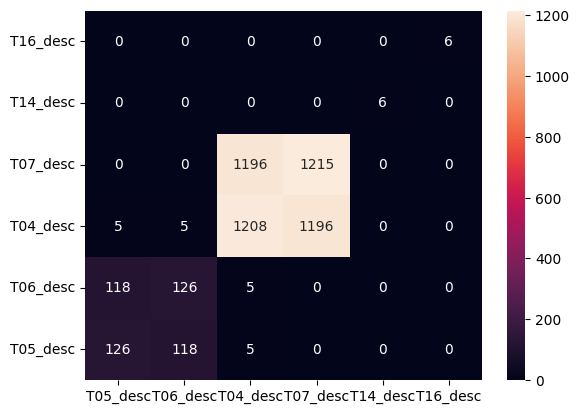

In [33]:
heatmap = pd.DataFrame(columns=['T05_desc','T06_desc','T04_desc','T07_desc','T14_desc','T16_desc'])
for i, c in zip([T16_desc,T14_desc,T07_desc,T04_desc,T06_desc,T05_desc],['T16_desc','T14_desc','T07_desc','T04_desc','T06_desc','T05_desc']):
    tmp = []
    for j in [T05_desc,T06_desc,T04_desc,T07_desc,T14_desc,T16_desc]:
        tmp.append(len(set(i.columns)&set(j.columns)))
    heatmap.loc[c]=tmp
heatmap = heatmap.astype(int)


filt = [[0,0,0,0,665,665],
        [0,0,0,0,665,665],
        [760,760,760,760,0,0],
        [760,760,760,760,0,0],
        [760,760,760,760,0,0],
        [760,760,760,760,0,0]]

for f, row in zip(filt, heatmap.iterrows()):
    heatmap.loc[row[0]] = row[1]-f
sns.heatmap(heatmap, annot=True, fmt='d')
plt.show()

In [34]:
dup_col = (set(T05_desc.columns)&set(T06_desc.columns)&set(T04_desc.columns)&set(T07_desc.columns))

In [35]:
tmp = ((set(T05_desc.columns)|set(T06_desc.columns))&(set(T04_desc.columns)|set(T07_desc.columns))-dup_col)

In [36]:
T04_desc[tmp]

,X_1219,X_1524,X_1525,X_1407,X_1523
count,4.0,4.000000,4.000000,4.000000,4.000000
mean,0.0,50.000000,50.000000,299.500000,50.000000
std,0.0,57.735027,57.735027,310.046771,57.735027
min,0.0,0.000000,0.000000,31.000000,0.000000
25%,0.0,0.000000,0.000000,31.000000,0.000000
50%,0.0,50.000000,50.000000,298.000000,50.000000
75%,0.0,100.000000,100.000000,566.500000,100.000000
max,0.0,100.000000,100.000000,571.000000,100.000000


In [17]:
len((set(T05_desc.columns)|set(T06_desc.columns)|set(T04_desc.columns)|set(T07_desc.columns)))

2116

In [18]:
len(set(T14_desc.columns)&set(T16_desc.columns))

665

In [19]:
len(set(T14_desc.columns)|set(T16_desc.columns))

677